<a href="https://colab.research.google.com/github/HiImGabry/speech-recognition-representation-unica-dl/blob/issue-2/Analisi_Esplorativa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Analisi Dataset*

In [51]:
#importo le librerie necessarie
import tensorflow as tf
import pathlib
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as IPD


In [50]:
#tramite comandi per il terminale mi muovo all'interno del MIO personale drive(il path specificato potrebbe cambiare per voi)
!wget --no-check-certificate 'https://cdn.discordapp.com/attachments/1209871752134529066/1248571032449581116/reduced_dataset.zip?ex=666425e3&is=6662d463&hm=5d7859ac5d2e3fb59155f8e7d4e8bfb61e4d0ef173f878ddc42f53dd38c8d2cb&' -O ../reduced_dataset.zip
!unzip ../reduced_dataset.zip
!mv reduced_dataset ..

Streaming output truncated to the last 5000 lines.
  inflating: reduced_dataset/train/audio/right/adec6a94_nohash_0.wav  
  inflating: reduced_dataset/train/audio/right/afe0b87d_nohash_0.wav  
  inflating: reduced_dataset/train/audio/right/afe0b87d_nohash_1.wav  
  inflating: reduced_dataset/train/audio/right/aff582a1_nohash_0.wav  
  inflating: reduced_dataset/train/audio/right/b06c19b0_nohash_1.wav  
  inflating: reduced_dataset/train/audio/right/b0bad4a9_nohash_1.wav  
  inflating: reduced_dataset/train/audio/right/b0c0197e_nohash_1.wav  
  inflating: reduced_dataset/train/audio/right/b15fc37d_nohash_0.wav  
  inflating: reduced_dataset/train/audio/right/b19f7f5f_nohash_0.wav  
  inflating: reduced_dataset/train/audio/right/b43de700_nohash_0.wav  
  inflating: reduced_dataset/train/audio/right/b4604db4_nohash_1.wav  
  inflating: reduced_dataset/train/audio/right/b49caed3_nohash_0.wav  
  inflating: reduced_dataset/train/audio/right/b49caed3_nohash_1.wav  
  inflating: reduced_datas

In [57]:
#qui abbiamo un primo esempio di cosa è contenuto in una delle nostre cartelle
!ls /reduced_dataset/train/audio/wow

00f0204f_nohash_0.wav  3fb8c268_nohash_0.wav  815f0f03_nohash_1.wav  c0f8f4df_nohash_1.wav
0135f3f2_nohash_1.wav  40115b19_nohash_0.wav  81a345a3_nohash_1.wav  c0f8f4df_nohash_2.wav
014f9f65_nohash_0.wav  41dce6f5_nohash_1.wav  82e7204d_nohash_0.wav  c120e80e_nohash_0.wav
01648c51_nohash_0.wav  4290ca61_nohash_0.wav  83957201_nohash_0.wav  c1b7c224_nohash_0.wav
023a61ad_nohash_0.wav  43691f67_nohash_2.wav  84999496_nohash_0.wav  c1d39ce8_nohash_0.wav
026290a7_nohash_0.wav  43b85b64_nohash_0.wav  85b877b5_nohash_1.wav  c1e0e8e3_nohash_0.wav
035de8fe_nohash_0.wav  43f57297_nohash_0.wav  8601f33b_nohash_0.wav  c3538de1_nohash_0.wav
035de8fe_nohash_1.wav  43fc47a7_nohash_1.wav  8601f33b_nohash_1.wav  c3538de1_nohash_1.wav
037c445a_nohash_0.wav  44260689_nohash_0.wav  86402da1_nohash_0.wav  c4533c47_nohash_0.wav
0447d7c1_nohash_0.wav  44715c1c_nohash_0.wav  87014d40_nohash_0.wav  c4533c47_nohash_1.wav
05cf43ef_nohash_1.wav  44bc77f7_nohash_3.wav  87c62767_nohash_1.wav  c4f875a9_nohash_0.wav

In [59]:
path_dataset = 'reduced_dataset/train/audio'

data_dir = pathlib.Path(path_dataset)
labels = np.array(tf.io.gfile.listdir(str(data_dir)))
labels = labels[labels != '.DS_Store'] #rimuovo .DS_Store perché non è un comando, devo chiedere a Gabry cosa sia
print('Labels che troviamo nelle varie cartelle: ', labels)

Labels che troviamo nelle varie cartelle:  ['down' 'up' 'stop' 'right' 'nine' 'marvin' 'off' 'yes' 'on' 'seven' 'one'
 'sheila' 'dog' 'wow' 'no' 'bird' 'bed' 'left' 'two' 'house' 'six' 'three'
 'cat' 'happy' 'zero' 'four' 'five' 'go' 'tree' 'eight']


In [60]:
#passiamo ora a vedere da quanti file è composto il nostro dataset di train
num_audio_train = tf.io.gfile.glob(str(data_dir) + '/*/*')
num_audio_train = tf.random.shuffle(num_audio_train)

print('Numero totale di file audio: ', len(num_audio_train))


number_audio_for_label = len(tf.io.gfile.listdir(str(data_dir/labels[0])))
print("Il numero di file audio per ogni singola label è:", number_audio_for_label)

Numero totale di file audio:  12933
Il numero di file audio per ogni singola label è: 471


In [66]:
#proviamo ad ascoltare un audio e capiamo come farlo sopratutto
path_audio = 'reduced_dataset/train/audio/wow/026290a7_nohash_0.wav'
audio = IPD.Audio(path_audio, autoplay=True)
display(audio)


In [67]:
def decode_audio(audio_binary):
  audio, _ = tf.audio.decode_wav(contents=audio_binary)
  return tf.squeeze(audio, axis = -1)

def get_label(file_path):
  parts = tf.strings.split(
      input=file_path,
      sep=os.path.sep
  )
  return parts[-2]

def get_wave_and_label(file_path):
  label = get_label(file_path)
  audio_binary = tf.io.read_file(file_path)
  wave = decode_audio(audio_binary)
  return wave, label

In [68]:
AUTOTUNE = tf.data.AUTOTUNE
files_ds = tf.data.Dataset.from_tensor_slices(num_audio_train)

wave_ds = files_ds.map(
    map_func=get_wave_and_label,
    num_parallel_calls=AUTOTUNE
)

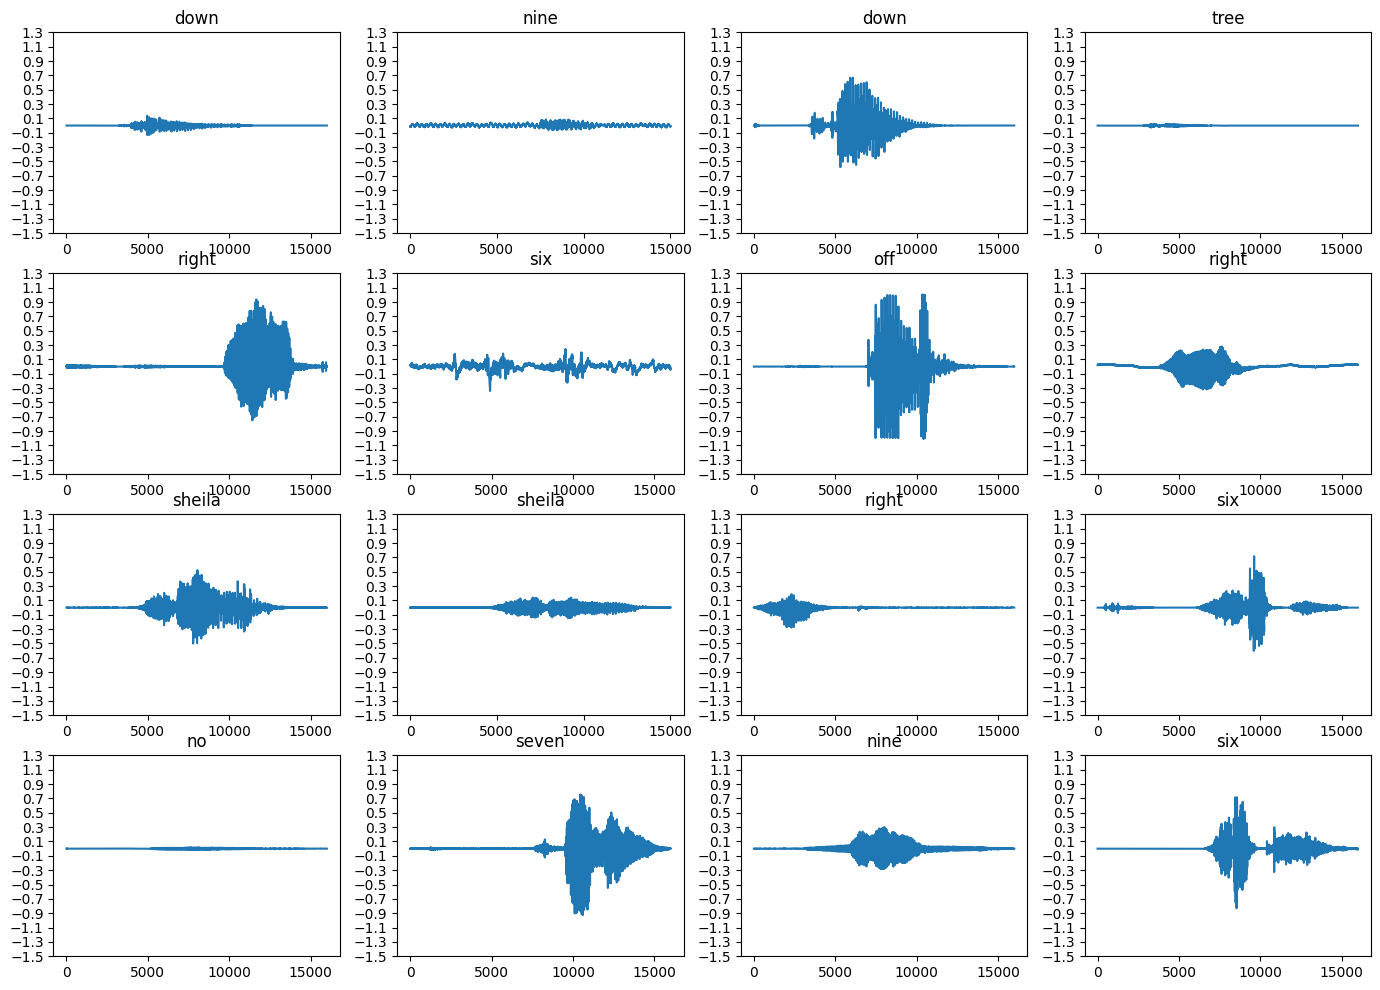

In [69]:
#codice preso dalla documentazione ufficiale di TensorFlow, raga scusate ma non sapevo fare i grafici
#anyway, qui estraiamo dei campioni di audio e vediamo alcune delle forme di onde degli audio
rows = 4
cols = 4

n = rows * cols

fig,axes = plt.subplots(rows, cols, figsize=(17,12))


for i, (audio, label) in enumerate (wave_ds.take(n)):
  r = i // cols
  c = i % cols
  ax = axes[r][c]
  ax.plot(audio.numpy())
  ax.set_yticks(np.arange(-1.5, 1.5, 0.2))
  label = label.numpy().decode('utf-8')
  ax.set_title(label)

plt.show()